In [378]:
import pandas as pd

In [379]:
# df_final_complete = pd.read_csv('a:/bloeding-met-patientenlijst-gedetailleerd/df_final_complete.csv')
# df_final_complete.head()


df_final_complete = pd.read_csv('a:/bloeding-met-patientenlijst-gedetailleerd/df_final_complete1.csv')
df_final_complete.head()


,pseudo_id,agib_final,gib_final,scopie_final,treatment_final,is_seh,is_scopie,scopie_after_seh,signficant_hb_drop_7_days,signficant_hb_drop_7_days_max_min,...,high_aptt,high_inr,high_mcv,high_pt,high_ureum,low_hb,low_hematocriet,low_mcv,low_plt,bora_hb_ait
0,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,False,True,True,True,True,True,True,False,False,...,NaN,True,False,NaN,False,True,NaN,False,False,False
1,088C9FD98B8B2CBCB597C17C07AC1845B21F0849,False,True,True,True,True,True,False,False,True,...,NaN,NaN,False,NaN,True,False,False,False,False,True
2,0A5645E02FA818D1629926B6BEFA81CF91C25A46,False,True,True,True,True,True,True,False,False,...,NaN,NaN,False,NaN,False,True,True,True,True,False
3,0BC512A65442D0BB4B00FBE05E7EA6283E5C11FD,False,True,True,True,True,True,True,False,False,...,NaN,NaN,False,NaN,True,True,True,True,True,False
4,0DD73490997F61870C32B3BB7C9CDE4E801FFF7D,False,True,True,True,True,True,True,False,False,...,False,False,True,False,True,True,True,False,False,True


In [380]:
df_final_complete.columns

Index(['pseudo_id', 'agib_final', 'gib_final', 'scopie_final',
       'treatment_final', 'is_seh', 'is_scopie', 'scopie_after_seh',
       'signficant_hb_drop_7_days', 'signficant_hb_drop_7_days_max_min',
       'sigh_hb_drop_text', 'high_aptt', 'high_inr', 'high_mcv', 'high_pt',
       'high_ureum', 'low_hb', 'low_hematocriet', 'low_mcv', 'low_plt',
       'bora_hb_ait'],
      dtype='object')

In [381]:
df_final_complete[df_final_complete['treatment_final']]['pseudo_id'].nunique()

91

In [382]:
df_final_complete['pseudo_id'].nunique()

105

In [383]:


df_final_complete = df_final_complete[~df_final_complete['pseudo_id'].isin([
    '29871744C90865C3425F00A1935BFF9D2354DA44',
    '82A5BDCD295AC677FBAB42B490D1D3B119BA982D',
    '89AC6D361AFD06F17C1D3A2865C3B42BD8F40111',
    'C5EE7D6FA25DF773D7EF38E213CDAAA1419C1A7A'
])]

df_final_complete['pseudo_id'].nunique()

101

In [384]:
def is_strong_treatment(row):
    return (
        row['treatment_final'] and
        (
            (row['low_hb'] == True) |
            (row['high_inr'] == True) |
            (row['scopie_after_seh'] == True) |
            (row['signficant_hb_drop_7_days'] == True) |
            (row['signficant_hb_drop_7_days_max_min'] == True) |
            (row['sigh_hb_drop_text'] == True) 
            
        )
    )

df_final_complete['treatment_final_strict'] = df_final_complete.apply(is_strong_treatment, axis=1)
print(df_final_complete[df_final_complete['treatment_final_strict']]['pseudo_id'].nunique())
df_final_complete


88


,pseudo_id,agib_final,gib_final,scopie_final,treatment_final,is_seh,is_scopie,scopie_after_seh,signficant_hb_drop_7_days,signficant_hb_drop_7_days_max_min,...,high_inr,high_mcv,high_pt,high_ureum,low_hb,low_hematocriet,low_mcv,low_plt,bora_hb_ait,treatment_final_strict
0,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,False,True,True,True,True,True,True,False,False,...,True,False,NaN,False,True,NaN,False,False,False,True
1,088C9FD98B8B2CBCB597C17C07AC1845B21F0849,False,True,True,True,True,True,False,False,True,...,NaN,False,NaN,True,False,False,False,False,True,True
2,0A5645E02FA818D1629926B6BEFA81CF91C25A46,False,True,True,True,True,True,True,False,False,...,NaN,False,NaN,False,True,True,True,True,False,True
3,0BC512A65442D0BB4B00FBE05E7EA6283E5C11FD,False,True,True,True,True,True,True,False,False,...,NaN,False,NaN,True,True,True,True,True,False,True
4,0DD73490997F61870C32B3BB7C9CDE4E801FFF7D,False,True,True,True,True,True,True,False,False,...,False,True,False,True,True,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,F797097BA39F81B05EEC3F251973743CA03CB9B4,False,True,True,True,True,True,True,False,False,...,NaN,True,True,False,True,True,False,True,True,True
101,F8C241E69061BB450778B7A4CC336FF520469A0A,False,True,True,False,True,False,False,False,False,...,NaN,False,NaN,True,True,True,False,True,True,False
102,F8D116F01EE0039678998F393FA337C10AD4F4E2,False,True,True,True,True,True,True,False,False,...,False,False,NaN,True,False,False,False,False,False,True
103,FAA79717FF2C725767E9469350ACECF640E5FCBC,False,True,True,True,True,False,False,True,True,...,True,False,True,True,True,True,True,False,True,True


In [385]:
df_final_complete[df_final_complete['treatment_final'] != df_final_complete['treatment_final_strict']]

,pseudo_id,agib_final,gib_final,scopie_final,treatment_final,is_seh,is_scopie,scopie_after_seh,signficant_hb_drop_7_days,signficant_hb_drop_7_days_max_min,...,high_inr,high_mcv,high_pt,high_ureum,low_hb,low_hematocriet,low_mcv,low_plt,bora_hb_ait,treatment_final_strict


In [386]:
df_final_complete[df_final_complete['gib_final'] == False]['pseudo_id']

78    CC5561A5F783FAF250D15C10B724E5AC1F0A9E62
Name: pseudo_id, dtype: object

In [387]:
df_final_complete['likely_gib_bleed'] = (
    (df_final_complete['low_hb'] == True) & (df_final_complete['high_ureum'] == True)
) 


df_final_complete['likely_gib_bleed'].value_counts()

True     59
False    42
Name: likely_gib_bleed, dtype: int64

In [388]:
df_final_complete['likely_gib_bleed'] = (
    (df_final_complete['low_hb'] == True) & (df_final_complete['high_ureum'] == True)
) | (
    df_final_complete[[
        'low_hb', 'low_hematocriet', 'low_plt',
        'low_mcv', 'high_inr', 'high_aptt', 'high_pt'
    ]].sum(axis=1, skipna=True) >= 2
)

df_final_complete['likely_gib_bleed'].value_counts()

True     78
False    23
Name: likely_gib_bleed, dtype: int64

In [389]:
df_final_complete['likely_agib_bleed'] = (
    (df_final_complete['low_hb'] == True) & (
        # (df_final_complete['is_seh'] == True) |
        (df_final_complete['scopie_after_seh'] == True) |
        (df_final_complete['signficant_hb_drop_7_days'] == True)
    )
)

df_final_complete['likely_agib_bleed'].value_counts()

True     51
False    50
Name: likely_agib_bleed, dtype: int64

In [390]:
df_final_complete['likely_agib_bleed'] = (
    (df_final_complete['low_hb'] == True) & (
        (df_final_complete['is_seh'] == True) |
        (df_final_complete['scopie_after_seh'] == True) |
        (df_final_complete['signficant_hb_drop_7_days'] == True) |
        (df_final_complete['gib_final'] == True) |
        (df_final_complete['agib_final'] == True) 
    )
)

df_final_complete['likely_agib_bleed'].value_counts()

True     85
False    16
Name: likely_agib_bleed, dtype: int64

In [391]:
df_final_complete['likely_agib_bleed'] = (
    (df_final_complete['signficant_hb_drop_7_days'] == True) & (
        df_final_complete['scopie_after_seh'] == True)

)
df_final_complete['likely_agib_bleed'].value_counts()

False    84
True     17
Name: likely_agib_bleed, dtype: int64

In [392]:
df_final_complete['likely_agib_bleed'] = (
    (df_final_complete['agib_final'] == True) | (
    (df_final_complete['signficant_hb_drop_7_days'] == True) & (
        df_final_complete['scopie_after_seh'] == True)
    )

)

df_final_complete['likely_agib_bleed'].value_counts()

False    81
True     20
Name: likely_agib_bleed, dtype: int64

In [393]:
df_final_complete['likely_agib_bleed'] = (
    (df_final_complete['agib_final'] == True) | (
    (df_final_complete['signficant_hb_drop_7_days'] == True) | (
        df_final_complete['scopie_after_seh'] == True)
    )

    # (df_final_complete['low_hb'] == True) & (
    #     (df_final_complete['is_seh'] == True) |
    #     (df_final_complete['scopie_after_seh'] == True) |
    #     (df_final_complete['signficant_hb_drop_7_days'] == True) |
    #     (df_final_complete['gib_final'] == True) |
    #     (df_final_complete['agib_final'] == True) 
    # )
)

df_final_complete['likely_agib_bleed'].value_counts()

True     60
False    41
Name: likely_agib_bleed, dtype: int64

In [394]:
df_final_complete['likely_agib_bleed'] = (
    (df_final_complete['agib_final'] == True) | (
    # (df_final_complete['signficant_hb_drop_7_days'] == True) | 
    #     df_final_complete['scopie_after_seh'] == True) | (
    #     (df_final_complete['low_hb'] == True) & (
    #         df_final_complete['high_ureum'] == True) | (

        (df_final_complete['gib_final'] == True) & (
            (df_final_complete['low_hb'] == True) & (
                df_final_complete['high_ureum'] == True)) | (
                    (df_final_complete['signficant_hb_drop_7_days'] == True) | (
                        df_final_complete['scopie_after_seh'] == True)
                    ) | (
                        df_final_complete[[
                            'low_hb', 'low_hematocriet', 'low_plt',
                            'low_mcv', 'high_inr', 'high_aptt', 'high_pt'
                        ]].sum(axis=1, skipna=True) >= 2
                        
                    )
            )
    )


df_final_complete['likely_agib_bleed'].value_counts()

True     91
False    10
Name: likely_agib_bleed, dtype: int64

In [395]:
# df_final_complete

In [396]:
df_final_complete['likely_agib_bleed'] = (
    (df_final_complete['agib_final'] == True) | (
    # (df_final_complete['signficant_hb_drop_7_days'] == True) | 
    #     df_final_complete['scopie_after_seh'] == True) | (
    #     (df_final_complete['low_hb'] == True) & (
    #         df_final_complete['high_ureum'] == True) | (

        (df_final_complete['gib_final'] == True) & (
            (df_final_complete['low_hb'] == True) & (
                df_final_complete['high_ureum'] == True)) | (

                    (df_final_complete['signficant_hb_drop_7_days'] == True) | (
                        df_final_complete['scopie_after_seh'] == True)
                    ) | (
                        df_final_complete[[
                            'low_hb', 'low_hematocriet', 'low_plt',
                            'low_mcv', 'high_inr', 'high_aptt', 'high_pt'
                        ]].sum(axis=1, skipna=True) >= 2
                        
                    ) | (
                        (df_final_complete['treatment_final'] == True) & (
                            df_final_complete['low_hb'] == True) | (
                                    (df_final_complete['signficant_hb_drop_7_days'] == True) | (
                                        df_final_complete['scopie_after_seh'] == True)
                                    ) | (
                                        df_final_complete[[
                                            'low_hb', 'low_hematocriet', 'low_plt',
                                            'low_mcv', 'high_inr', 'high_aptt', 'high_pt'
                                        ]].sum(axis=1, skipna=True) >= 2
                                        
                                    )
                        | (
                        (df_final_complete['scopie_final'] == True) & (
                            df_final_complete['low_hb'] == True) | (
                                    (df_final_complete['signficant_hb_drop_7_days'] == True) | (
                                        df_final_complete['scopie_after_seh'] == True)
                                    ) | (
                                        df_final_complete[[
                                            'low_hb', 'low_hematocriet', 'low_plt',
                                            'low_mcv', 'high_inr', 'high_aptt', 'high_pt'
                                        ]].sum(axis=1, skipna=True) >= 2
                                        
                                    )
            )))
    )


df_final_complete['likely_agib_bleed'].value_counts()

True     94
False     7
Name: likely_agib_bleed, dtype: int64

In [397]:
# Define helper logic blocks
lab_criteria = (
    (df_final_complete['low_hb'] == True) &
    (df_final_complete['high_ureum'] == True)
) | (
    # df_final_complete[['low_hb', 'low_hematocriet', 'low_plt',
    #                    'low_mcv', 'high_inr', 'high_aptt', 'high_pt']].sum(axis=1, skipna=True) >= 2
    df_final_complete[['low_hb', 'low_hematocriet', 'low_plt',
                   'high_mcv', 'high_inr', 'high_aptt', 'high_pt']].fillna(False).sum(axis=1) >= 2

)

extra_criteria = (
    (df_final_complete['signficant_hb_drop_7_days'] == True) |
    (df_final_complete['scopie_after_seh'] == True)
)

treatment_pathway = (
    (df_final_complete['treatment_final_strict'] == True) 
)

scopie_pathway = (
    (df_final_complete['scopie_final'] == True) 
)

gib_pathway = (df_final_complete['gib_final'] == True    )


# Final likely AGIB decision
df_final_complete['likely_agib_bleed'] = (
    (df_final_complete['agib_final'] == True) |
    gib_pathway |
    treatment_pathway |
    scopie_pathway
)

df_final_complete['likely_agib_bleed'].value_counts()

True    101
Name: likely_agib_bleed, dtype: int64

In [398]:
# Define helper logic blocks
lab_criteria = (
    (df_final_complete['low_hb'] == True) &
    (df_final_complete['high_ureum'] == True)
) | (
    # df_final_complete[['low_hb', 'low_hematocriet', 'low_plt',
    #                    'low_mcv', 'high_inr', 'high_aptt', 'high_pt']].sum(axis=1, skipna=True) >= 2
    df_final_complete[['low_hb', 'low_hematocriet', 'low_plt',
                   'high_mcv', 'high_inr', 'high_aptt', 'high_pt']].fillna(False).sum(axis=1) >= 2

)

extra_criteria = (
    # (df_final_complete['final_hb_drop_evidence'] == True) |
    (df_final_complete['scopie_after_seh'] == True) |
    (df_final_complete['is_seh'] == True) 
)

treatment_pathway = (
    (df_final_complete['treatment_final_strict'] == True) & (
        df_final_complete['low_hb'] == True | extra_criteria | lab_criteria
    )
)

scopie_pathway = (
    (df_final_complete['scopie_final'] == True) &     
    (df_final_complete['gib_final'] == True) &
    (df_final_complete['low_hb'] == True | extra_criteria | lab_criteria)
)

gib_pathway = (
    (df_final_complete['gib_final'] == True) & (lab_criteria)
    )


# Final likely AGIB decision
df_final_complete['likely_agib_bleed'] = (
    (df_final_complete['agib_final'] == True) |
    gib_pathway |
    treatment_pathway |
    scopie_pathway
)

df_final_complete['likely_agib_bleed'].value_counts()

True     86
False    15
Name: likely_agib_bleed, dtype: int64

In [399]:
print("Total likely AGIB:", df_final_complete['likely_agib_bleed'].sum())
print("AGIB (text only):", df_final_complete['agib_final'].sum())
print("GIB + labs:", gib_pathway.sum())
print("Treatment-based AGIB:", treatment_pathway.sum())
print("Scopie-based AGIB:", scopie_pathway.sum())


Total likely AGIB: 86
AGIB (text only): 3
GIB + labs: 78
Treatment-based AGIB: 73
Scopie-based AGIB: 83


In [400]:
only_scopie = df_final_complete[
    (scopie_pathway) & 
    ~(df_final_complete['agib_final'] | gib_pathway | treatment_pathway)
]
print(f"AGIB patients only via scopie: {len(only_scopie)}")


AGIB patients only via scopie: 1


In [401]:
print(df_final_complete['gib_final'].value_counts(dropna=False))
print(df_final_complete['likely_gib_bleed'].value_counts(dropna=False))

print(df_final_complete['agib_final'].value_counts(dropna=False))
print(df_final_complete['likely_agib_bleed'].value_counts(dropna=False))


True     100
False      1
Name: gib_final, dtype: int64
True     78
False    23
Name: likely_gib_bleed, dtype: int64
False    98
True      3
Name: agib_final, dtype: int64
True     86
False    15
Name: likely_agib_bleed, dtype: int64


In [402]:
# pip install matplotlib_venn

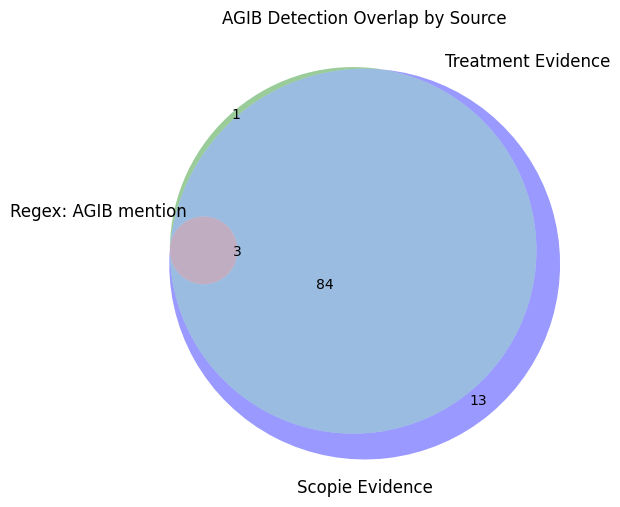

In [403]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Define sets based on pseudo_id
regex_set = set(df_final_complete[df_final_complete['agib_final'] == True]['pseudo_id'])
treatment_set = set(df_final_complete[df_final_complete['treatment_final_strict'] == True]['pseudo_id'])
scopie_set = set(df_final_complete[df_final_complete['scopie_final'] == True]['pseudo_id'])

# Plot Venn Diagram
plt.figure(figsize=(7, 6))
venn3(
    subsets=(regex_set, treatment_set, scopie_set),
    set_labels=('Regex: AGIB mention', 'Treatment Evidence', 'Scopie Evidence')
)
plt.title("AGIB Detection Overlap by Source")
plt.show()


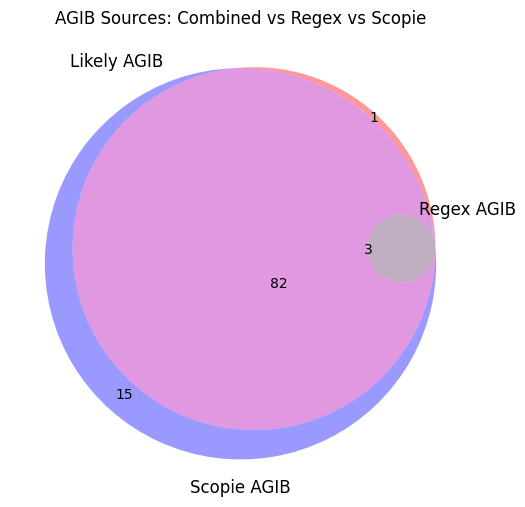

In [404]:
from matplotlib_venn import venn3

plt.figure(figsize=(7, 6))
venn3(
    subsets=(
        set(df_final_complete[df_final_complete['likely_agib_bleed']]['pseudo_id']),
        set(df_final_complete[df_final_complete['agib_final']]['pseudo_id']),
        set(df_final_complete[df_final_complete['scopie_final']]['pseudo_id']),
    ),
    set_labels=('Likely AGIB', 'Regex AGIB', 'Scopie AGIB')
)
plt.title("AGIB Sources: Combined vs Regex vs Scopie")
plt.show()


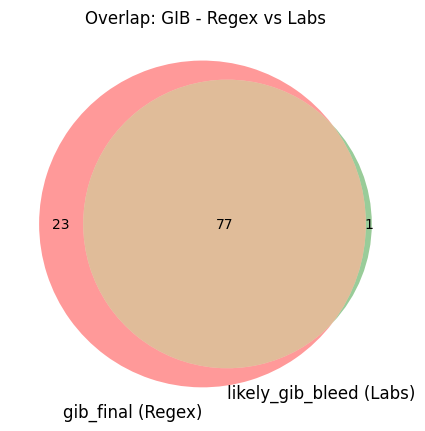

In [405]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
venn2(
    subsets=(
        set(df_final_complete[df_final_complete['gib_final'] == True]['pseudo_id']),
        set(df_final_complete[df_final_complete['likely_gib_bleed'] == True]['pseudo_id'])
    ),
    set_labels=('gib_final (Regex)', 'likely_gib_bleed (Labs)')
)
plt.title("Overlap: GIB - Regex vs Labs")
plt.show()


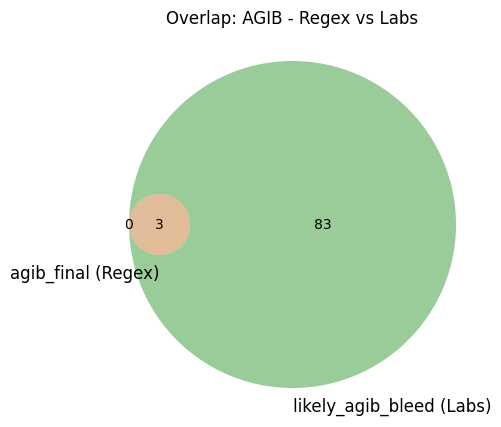

In [406]:
plt.figure(figsize=(6, 5))
venn2(
    subsets=(
        set(df_final_complete[df_final_complete['agib_final'] == True]['pseudo_id']),
        set(df_final_complete[df_final_complete['likely_agib_bleed'] == True]['pseudo_id'])
    ),
    set_labels=('agib_final (Regex)', 'likely_agib_bleed (Labs)')
)
plt.title("Overlap: AGIB - Regex vs Labs")
plt.show()

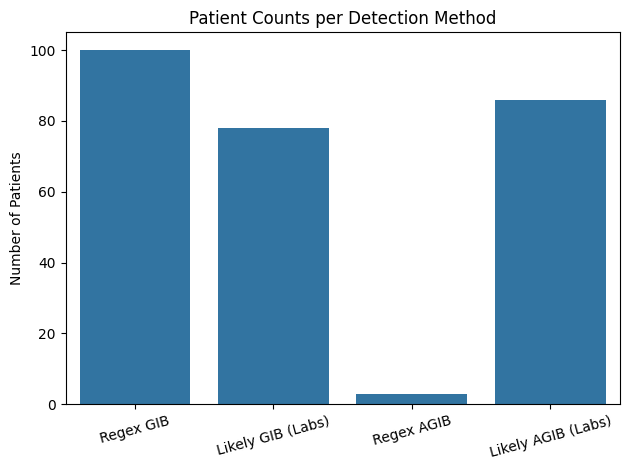

In [407]:
import seaborn as sns
import matplotlib.pyplot as plt

counts = {
    'Regex GIB': df_final_complete['gib_final'].sum(),
    'Likely GIB (Labs)': df_final_complete['likely_gib_bleed'].sum(),
    'Regex AGIB': df_final_complete['agib_final'].sum(),
    'Likely AGIB (Labs)': df_final_complete['likely_agib_bleed'].sum(),
}

sns.barplot(x=list(counts.keys()), y=list(counts.values()))
plt.title("Patient Counts per Detection Method")
plt.ylabel("Number of Patients")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


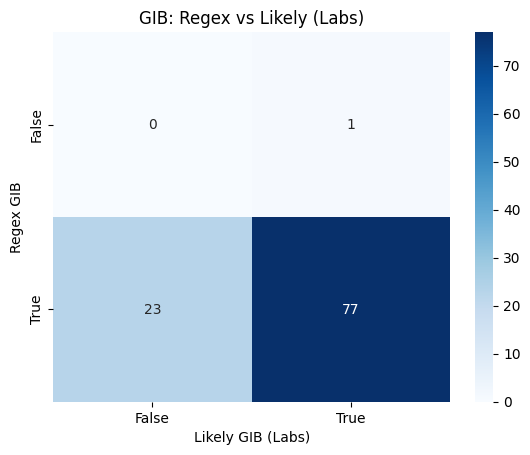

In [408]:
import pandas as pd

cross_gib = pd.crosstab(df_final_complete['gib_final'], df_final_complete['likely_gib_bleed'])
sns.heatmap(cross_gib, annot=True, fmt='d', cmap='Blues')
plt.title("GIB: Regex vs Likely (Labs)")
plt.xlabel("Likely GIB (Labs)")
plt.ylabel("Regex GIB")
plt.show()


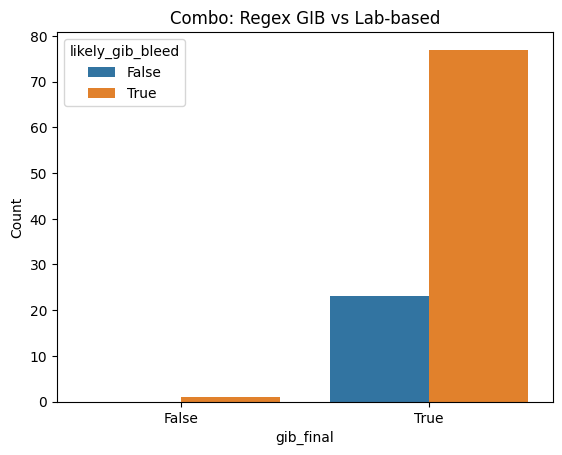

In [409]:
combo_counts = df_final_complete.groupby(
    ['gib_final', 'likely_gib_bleed']
).size().reset_index(name='count')

sns.barplot(data=combo_counts, x='gib_final', y='count', hue='likely_gib_bleed')
plt.title("Combo: Regex GIB vs Lab-based")
plt.xlabel("gib_final")
plt.ylabel("Count")
plt.show()


In [410]:
df_final_complete['true_label'] = 1  # All positive cases


In [411]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_classifier(pred_col):
    y_true = df_final_complete['true_label']
    y_pred = df_final_complete[pred_col].fillna(False).astype(int)

    print(f"--- Evaluation for: {pred_col} ---")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))  # Sensitivity — how many AGIBs you captured
    print("F1 Score :", f1_score(y_true, y_pred))
    print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))
    print()

# Evaluate your detection approaches
evaluate_classifier('agib_final')
evaluate_classifier('likely_agib_bleed')
# evaluate_classifier('(a)gib_final')  # if this is another combined signal


--- Evaluation for: agib_final ---
Accuracy : 0.0297029702970297
Precision: 1.0
Recall   : 0.0297029702970297
F1 Score : 0.057692307692307696
Confusion matrix:
 [[ 0  0]
 [98  3]]

--- Evaluation for: likely_agib_bleed ---
Accuracy : 0.8514851485148515
Precision: 1.0
Recall   : 0.8514851485148515
F1 Score : 0.9197860962566845
Confusion matrix:
 [[ 0  0]
 [15 86]]



In [412]:
# Patients not picked up by a rule
df_final_complete[(df_final_complete['likely_agib_bleed'] == False)]



,pseudo_id,agib_final,gib_final,scopie_final,treatment_final,is_seh,is_scopie,scopie_after_seh,signficant_hb_drop_7_days,signficant_hb_drop_7_days_max_min,...,high_ureum,low_hb,low_hematocriet,low_mcv,low_plt,bora_hb_ait,treatment_final_strict,likely_gib_bleed,likely_agib_bleed,true_label
1,088C9FD98B8B2CBCB597C17C07AC1845B21F0849,False,True,True,True,True,True,False,False,True,...,True,False,False,False,False,True,True,False,False,1
5,0E041554A0B23505AD762D006AB320CF4AF8F969,False,True,True,True,True,False,False,False,False,...,True,False,False,False,False,False,True,False,False,1
11,21031C9814F3BD6EFACD9FBC5AF409820CDABAB4,False,True,True,True,True,True,True,False,False,...,True,False,False,False,False,False,True,False,False,1
13,2242661E0D65C316E93EF5328929944799379F22,False,True,True,True,True,True,False,False,False,...,True,False,False,False,False,False,True,False,False,1
21,36B03320CFFDB5C757F2DF59633886CF0D05AF9D,False,True,True,True,True,True,True,False,False,...,NaN,False,False,False,True,False,True,False,False,1
28,4638DB7DCC0B32533B044E06CE9720FB9F729D64,False,True,True,True,True,True,False,False,False,...,True,False,False,False,True,False,True,False,False,1
38,6E3082A914A5A2ACE5B7F0B1F0C1294221BBD9C1,False,True,True,True,True,True,False,False,False,...,NaN,False,NaN,False,False,False,True,False,False,1
44,819049AF3EE8DE15E28B232DC3E2A192F6D0E6B4,False,True,True,True,True,True,True,False,False,...,True,False,False,False,False,False,True,False,False,1
51,8D59B35BBF1DD6A47DEE04D5CE8BE848639D9A73,False,True,True,False,True,True,False,False,False,...,True,False,False,False,False,True,False,False,False,1
65,B3EED5BDCD189C8E78AEC6626C504EA16EC0C290,False,True,True,True,True,True,True,False,False,...,False,False,False,True,False,False,True,False,False,1


In [413]:
df_final_complete.columns

Index(['pseudo_id', 'agib_final', 'gib_final', 'scopie_final',
       'treatment_final', 'is_seh', 'is_scopie', 'scopie_after_seh',
       'signficant_hb_drop_7_days', 'signficant_hb_drop_7_days_max_min',
       'sigh_hb_drop_text', 'high_aptt', 'high_inr', 'high_mcv', 'high_pt',
       'high_ureum', 'low_hb', 'low_hematocriet', 'low_mcv', 'low_plt',
       'bora_hb_ait', 'treatment_final_strict', 'likely_gib_bleed',
       'likely_agib_bleed', 'true_label'],
      dtype='object')

Results for report


In [414]:
# List of the boolean columns you're interested in
criteria_cols = [
        'agib_final', 'gib_final', 'scopie_final',
       'treatment_final', 'is_seh', 'is_scopie', 'scopie_after_seh',
       'signficant_hb_drop_7_days', 'signficant_hb_drop_7_days_max_min',
       'sigh_hb_drop_text'
]

# Count how many patients meet each criterion
for col in criteria_cols:
    print(f"\n📊 Value counts for '{col}':")
    print(df_final_complete[col].value_counts())


📊 Value counts for 'agib_final':
False    98
True      3
Name: agib_final, dtype: int64

📊 Value counts for 'gib_final':
True     100
False      1
Name: gib_final, dtype: int64

📊 Value counts for 'scopie_final':
True     100
False      1
Name: scopie_final, dtype: int64

📊 Value counts for 'treatment_final':
True     88
False    13
Name: treatment_final, dtype: int64

📊 Value counts for 'is_seh':
True    101
Name: is_seh, dtype: int64

📊 Value counts for 'is_scopie':
True     86
False    15
Name: is_scopie, dtype: int64

📊 Value counts for 'scopie_after_seh':
False    52
True     49
Name: scopie_after_seh, dtype: int64

📊 Value counts for 'signficant_hb_drop_7_days':
False    74
True     27
Name: signficant_hb_drop_7_days, dtype: int64

📊 Value counts for 'signficant_hb_drop_7_days_max_min':
False    62
True     39
Name: signficant_hb_drop_7_days_max_min, dtype: int64

📊 Value counts for 'sigh_hb_drop_text':
True     80
False    21
Name: sigh_hb_drop_text, dtype: int64


In [415]:


# List of the boolean columns you're interested in
lab_cols = [
    'low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
    'high_mcv', 'high_inr', 'high_aptt', 'high_pt'
]

# Count how many patients meet each criterion
for col in lab_cols:
    print(f"\n📊 Value counts for '{col}':")
    print(df_final_complete[col].value_counts())


📊 Value counts for 'low_hb':
True     85
False    16
Name: low_hb, dtype: int64

📊 Value counts for 'low_hematocriet':
True     62
False    31
Name: low_hematocriet, dtype: int64

📊 Value counts for 'low_plt':
False    77
True     22
Name: low_plt, dtype: int64

📊 Value counts for 'high_ureum':
True     68
False    22
Name: high_ureum, dtype: int64

📊 Value counts for 'high_mcv':
False    80
True     21
Name: high_mcv, dtype: int64

📊 Value counts for 'high_inr':
True     14
False    12
Name: high_inr, dtype: int64

📊 Value counts for 'high_aptt':
False    12
True      8
Name: high_aptt, dtype: int64

📊 Value counts for 'high_pt':
True     13
False     6
Name: high_pt, dtype: int64


In [416]:
df = df_final_complete.copy()

In [417]:
# # Conservative AGIB logic
# df['final_agib_label'] = (
#     df['gib_final'] &
#     df['treatment_final_strict'] &
#     (df['signficant_hb_drop_7_days_max_min'] | df['scopie_after_seh'])
# )


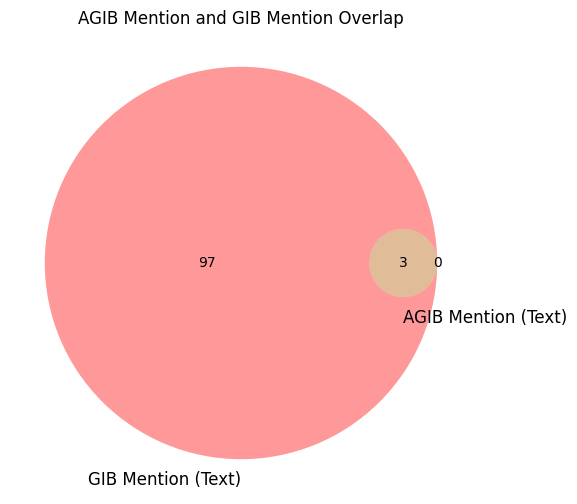

In [418]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Define sets based on pseudo_id
set1 = set(df[df['gib_final'] == True]['pseudo_id'].unique())
set2 = set(df[df['agib_final'] == True]['pseudo_id'].unique())
# set3 = set(df[df['sigh_hb_drop_text'] == True]['pseudo_id'].unique())

# Plot Venn Diagram
plt.figure(figsize=(7, 6))
venn2([set1, set2,], set_labels=('GIB Mention (Text)', 'AGIB Mention (Text)'))
plt.title("AGIB Mention and GIB Mention Overlap")
plt.show()

In [419]:
# df['agib_label_two_of_three'] = (
#     (
#         df['gib_final'].astype(int) +
#         df['signficant_hb_drop_7_days_max_min'].astype(int) +
#         df['scopie_after_seh'].astype(int)
#     ) >= 2
# )

# df['agib_label_two_of_three'].value_counts()

In [420]:
df['agib_label_text_only'] = df['agib_final']


In [421]:
# agib_cols = [
#     'agib_label_conservative',
#     'agib_label_moderate',
#     'agib_label_treatment_lab',
#     'agib_label_two_of_three',
#     'agib_label_text_only'
# ]

# for col in agib_cols:
#     print(f"{col}: {df[col].sum()} patients labeled AGIB")


In [422]:
# from sklearn.metrics import classification_report

# for col in agib_cols:
#     print(f"\n--- {col} ---")
#     print(classification_report(df['true_label'], df[col].astype(int)))


In [423]:
from sklearn.metrics import classification_report

for col in ['signficant_hb_drop_7_days', 'signficant_hb_drop_7_days_max_min', 'sigh_hb_drop_text']:
    print(f"\n=== {col} ===")
    print(classification_report(df['true_label'], df[col].fillna(False).astype(int)))



=== signficant_hb_drop_7_days ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.27      0.42       101

    accuracy                           0.27       101
   macro avg       0.50      0.13      0.21       101
weighted avg       1.00      0.27      0.42       101


=== signficant_hb_drop_7_days_max_min ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.39      0.56       101

    accuracy                           0.39       101
   macro avg       0.50      0.19      0.28       101
weighted avg       1.00      0.39      0.56       101


=== sigh_hb_drop_text ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.79      0.88       101

    accuracy                           0.79       101
   macro avg       0.50

c:\Users\Y.vanMegen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Y.vanMegen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Y.vanMegen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [424]:
df['agib_label_conservative'] = (
    df['gib_final'] &
    # df['treatment_final_strict'] &
    (df['signficant_hb_drop_7_days_max_min'] | df['scopie_after_seh'])
)

df['agib_label_conservative'].value_counts()


True     65
False    36
Name: agib_label_conservative, dtype: int64

In [425]:
df['has_structured_hb_drop'] = (
    df['signficant_hb_drop_7_days'] |
    df['signficant_hb_drop_7_days_max_min']
)

df['final_hb_drop_evidence'] = (
    df['has_structured_hb_drop'] |
    df['sigh_hb_drop_text']
)


df['final_hb_drop_evidence'].value_counts()

True     89
False    12
Name: final_hb_drop_evidence, dtype: int64

In [426]:
len(df[df['sigh_hb_drop_text'] == True]['pseudo_id'])

80

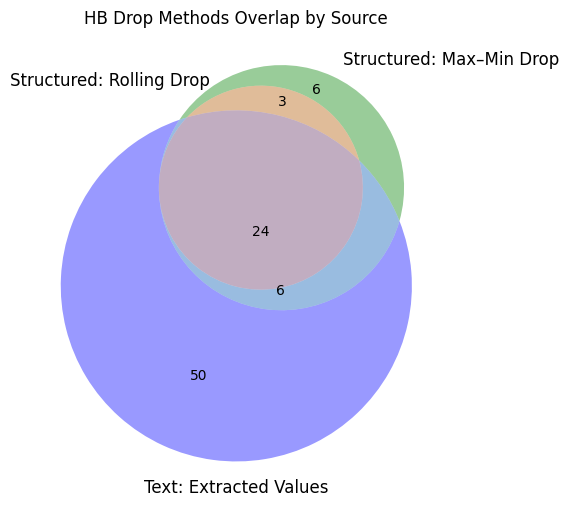

In [427]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Define sets based on pseudo_id
set1 = set(df[df['signficant_hb_drop_7_days'] == True]['pseudo_id'].unique())
set2 = set(df[df['signficant_hb_drop_7_days_max_min'] == True]['pseudo_id'].unique())
set3 = set(df[df['sigh_hb_drop_text'] == True]['pseudo_id'].unique())

# Plot Venn Diagram
plt.figure(figsize=(7, 6))
venn3([set1, set2, set3], set_labels=('Structured: Rolling Drop', 'Structured: Max–Min Drop', 'Text: Extracted Values'))
plt.title("HB Drop Methods Overlap by Source")
plt.show()

In [428]:
df['agib_label_strict'] = (
    df['gib_final'] &
    df['scopie_after_seh'] &
    df['final_hb_drop_evidence'] &
    df['is_seh']
)

df['agib_label_strict'].value_counts()

False    56
True     45
Name: agib_label_strict, dtype: int64

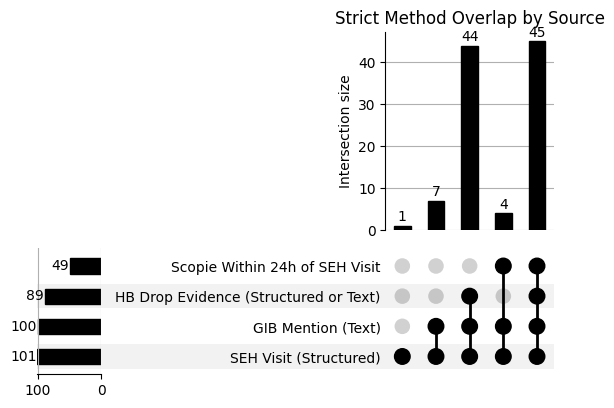

In [429]:
# # Install the required library
# %pip install upsetplot

from upsetplot import UpSet
import matplotlib.pyplot as plt
import pandas as pd

# Define sets based on pseudo_id
set1 = set(df[df['gib_final'] == True]['pseudo_id'].unique())
set2 = set(df[df['is_seh'] == True]['pseudo_id'].unique())
set3 = set(df[df['scopie_after_seh'] == True]['pseudo_id'].unique())
set4 = set(df[df['final_hb_drop_evidence'] == True]['pseudo_id'].unique())

# Create a DataFrame for UpSet plot
data = pd.DataFrame({
    'GIB Mention (Text)': df['pseudo_id'].isin(set1),
    'SEH Visit (Structured)': df['pseudo_id'].isin(set2),
    'Scopie Within 24h of SEH Visit': df['pseudo_id'].isin(set3),
    'HB Drop Evidence (Structured or Text)': df['pseudo_id'].isin(set4),
})

from upsetplot import from_memberships

# Convert the data to the required format for UpSet
memberships = []
for index, row in data.iterrows():
    memberships.append(
        [col for col, value in row.items() if value == 1]
    )

# Create the UpSet plot
upset_data = from_memberships(memberships)
upset = UpSet(upset_data, subset_size='count', show_counts=True)
upset.plot()
plt.title("Strict Method Overlap by Source")
plt.show()

In [430]:
print(upset_data)

GIB Mention (Text)  HB Drop Evidence (Structured or Text)  SEH Visit (Structured)  Scopie Within 24h of SEH Visit
True                True                                   True                    True                              1
                                                                                   False                             1
                                                                                   True                              1
                                                                                   True                              1
                                                                                   True                              1
                                                                                                                    ..
                                                                                   True                              1
                                                     

In [431]:
df['agib_label_less_strict'] = (
    df['gib_final'] & 
    (
    df[['scopie_after_seh', 'final_hb_drop_evidence', 'is_seh'
                        ]].sum(axis=1, skipna=True) >= 2
    )
    
)

df['agib_label_less_strict'].value_counts()

True     93
False     8
Name: agib_label_less_strict, dtype: int64

In [432]:
df['abnormal_lab_panel'] = (
    df[['low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
        'high_mcv', 'high_inr', 'high_aptt', 'high_pt']]
    .sum(axis=1, skipna=True) >= 2
)


df['abnormal_lab_panel_strict'] = (
    df[['low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
        'high_mcv', 'high_inr', 'high_aptt', 'high_pt']]
    .sum(axis=1, skipna=True) >= 3
)

df['abnormal_lab_panel_4_strict'] = (
    df[['low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
        'high_mcv', 'high_inr', 'high_aptt', 'high_pt']]
    .sum(axis=1, skipna=True) >= 4
)

df['abnormal_lab_panel_5_strict'] = (
    df[['low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
        'high_mcv', 'high_inr', 'high_aptt', 'high_pt']]
    .sum(axis=1, skipna=True) >= 5
)

print(df['abnormal_lab_panel'].value_counts())
print(df['abnormal_lab_panel_strict'].value_counts())
print(df['abnormal_lab_panel_4_strict'].value_counts())
print(df['abnormal_lab_panel_5_strict'].value_counts())

True     81
False    20
Name: abnormal_lab_panel, dtype: int64
True     61
False    40
Name: abnormal_lab_panel_strict, dtype: int64
False    71
True     30
Name: abnormal_lab_panel_4_strict, dtype: int64
False    87
True     14
Name: abnormal_lab_panel_5_strict, dtype: int64


Treatment

In [433]:
df['abnormal_lab_panel'] = (
    df['treatment_final'] & (
    df[['low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
        'high_mcv', 'high_inr', 'high_aptt', 'high_pt']]
    .sum(axis=1, skipna=True) >= 2)
)


df['abnormal_lab_panel_strict'] = (
    df['treatment_final'] & (
    df[['low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
        'high_mcv', 'high_inr', 'high_aptt', 'high_pt']]
    .sum(axis=1, skipna=True) >= 3)
)

df['abnormal_lab_panel_4_strict'] = (
    df['treatment_final'] & (
    df[['low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
        'high_mcv', 'high_inr', 'high_aptt', 'high_pt']]
    .sum(axis=1, skipna=True) >= 4)
)


print(df['abnormal_lab_panel'].value_counts())
print(df['abnormal_lab_panel_strict'].value_counts())
print(df['abnormal_lab_panel_4_strict'].value_counts())

True     70
False    31
Name: abnormal_lab_panel, dtype: int64
False    51
True     50
Name: abnormal_lab_panel_strict, dtype: int64
False    73
True     28
Name: abnormal_lab_panel_4_strict, dtype: int64


In [434]:
df['agib_label_treatment'] = (
    df['treatment_final'] & 

    (    
    df[['scopie_after_seh', 'final_hb_drop_evidence', 'is_seh'
                        ]].sum(axis=1, skipna=True) >= 2)
    
    
)

df['agib_label_treatment'].value_counts()

True     83
False    18
Name: agib_label_treatment, dtype: int64

In [435]:
df['agib_label_treatment'] = (
    df['treatment_final'] & 
    (
    (df_final_complete[[
    'low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
    'high_mcv', 'high_inr', 'high_aptt', 'high_pt'
    ]].sum(axis=1, skipna=True) >= 2) |
    (    
    df[['scopie_after_seh', 'final_hb_drop_evidence', 'is_seh'
                        ]].sum(axis=1, skipna=True) >= 3)
    )
    
)

df['agib_label_treatment'].value_counts()

True     77
False    24
Name: agib_label_treatment, dtype: int64

In [436]:
df['agib_label_treatment'] = (
    df['treatment_final'] & 
    (
    (df_final_complete[[
    'low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
    'high_mcv', 'high_inr', 'high_aptt', 'high_pt'
    ]].sum(axis=1, skipna=True) >= 1) |
    (    
    df[['scopie_after_seh', 'final_hb_drop_evidence', 'is_seh'
                        ]].sum(axis=1, skipna=True) >= 2)
    )
    
)

df['agib_label_treatment'].value_counts()

True     88
False    13
Name: agib_label_treatment, dtype: int64

In [437]:

df['agib_label_treatment'] = (
    df['treatment_final'] & 
    (
    (df_final_complete[[
    'low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
    'high_mcv', 'high_inr', 'high_aptt', 'high_pt'
    ]].sum(axis=1, skipna=True) >= 2) |
    (    
    df[['scopie_after_seh', 'final_hb_drop_evidence', 'is_seh'
                        ]].sum(axis=1, skipna=True) >= 2)
    )
    
)

df['agib_label_treatment'].value_counts()

True     85
False    16
Name: agib_label_treatment, dtype: int64

<Figure size 1000x600 with 0 Axes>

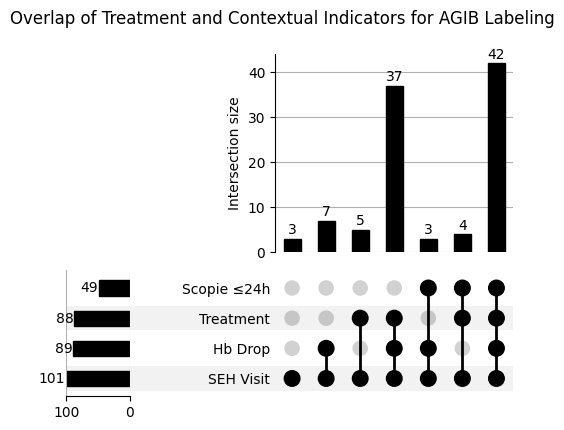

In [438]:
import pandas as pd
from matplotlib import pyplot as plt
from upsetplot import UpSet, from_memberships

# Use your actual DataFrame and columns
memberships = []
for _, row in df.iterrows():
    sets = []
    if row["treatment_final"]:
        sets.append("Treatment")
    if row["final_hb_drop_evidence"]:
        sets.append("Hb Drop")
    if row["is_seh"]:
        sets.append("SEH Visit")
    if row["scopie_after_seh"]:
        sets.append("Scopie ≤24h")
    memberships.append(sets)

# Generate the UpSet data
upset_data = from_memberships(memberships)

# Plot
plt.figure(figsize=(10, 6))
upset = UpSet(upset_data, subset_size='count', show_counts=True)
upset.plot()
plt.suptitle("Overlap of Treatment and Contextual Indicators for AGIB Labeling")
plt.show()


C:\Users\Y.vanMegen\AppData\Local\Temp\ipykernel_20800\3752516590.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

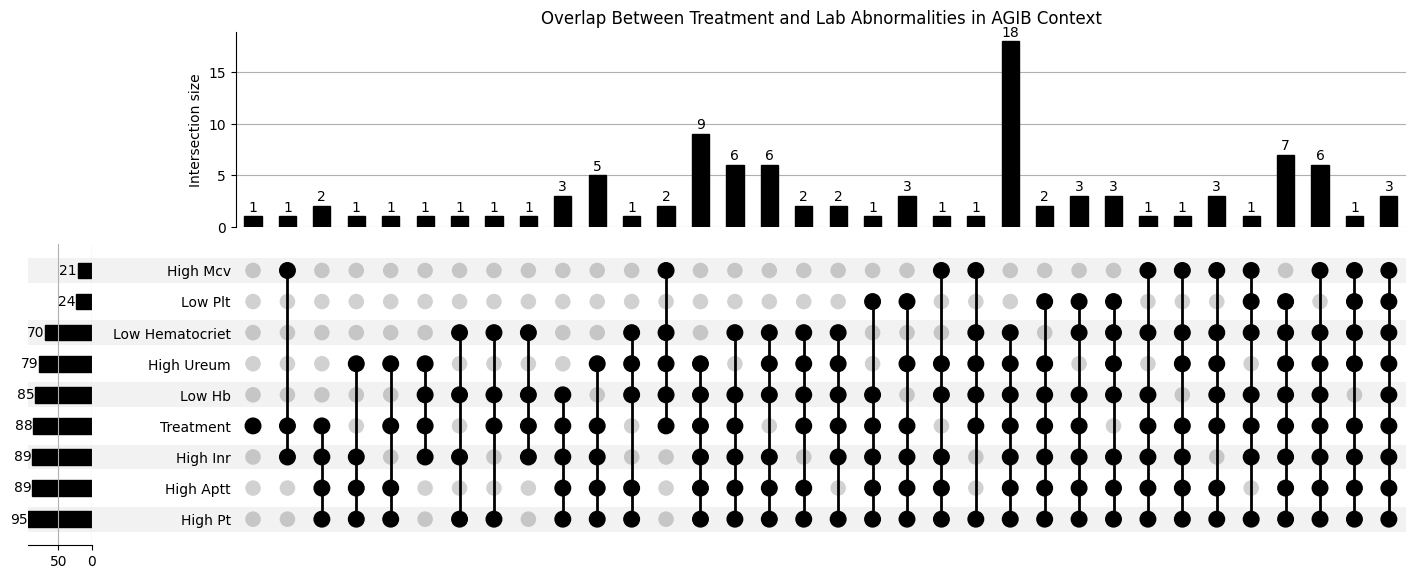

In [439]:
from upsetplot import from_memberships, UpSet
import matplotlib.pyplot as plt

# Define the individual variables to include
lab_columns = [
    'low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
    'high_mcv', 'high_inr', 'high_aptt', 'high_pt'
]

# Initialize list to store set memberships
memberships = []

# Iterate through each row to build sets
for _, row in df.iterrows():
    sets = []
    if row.get("treatment_final"):
        sets.append("Treatment")
    for col in lab_columns:
        if row.get(col):
            sets.append(col.replace('_', ' ').title())  # Make names cleaner
    if sets:  # Only include rows with at least one True
        memberships.append(sets)

# Generate UpSet data
upset_data = from_memberships(memberships)

# Plot
plt.figure(figsize=(12, 6))
upset = UpSet(upset_data, subset_size='count', show_counts=True)
upset.plot()
plt.title("Overlap Between Treatment and Lab Abnormalities in AGIB Context")
plt.tight_layout()
plt.show()


In [440]:
# print(df_subset.head())
# print(df_subset.dtypes)
# print("Total rows:", len(df_subset))
# print("Any row with at least one True:", (df_subset.any(axis=1).sum()))


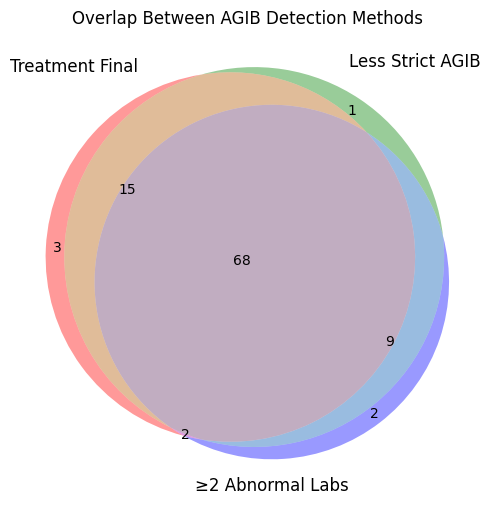

In [441]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_memberships

# Create the lab abnormality flag
df['abnormal_lab_panel'] = df[[
    'low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
    'high_mcv', 'high_inr', 'high_aptt', 'high_pt'
]].sum(axis=1, skipna=True) >= 2

df['treatment_criteria_2_of_3'] = df[[
    'final_hb_drop_evidence', 'scopie_after_seh', 'is_seh'
]].sum(axis=1, skipna=True) >= 2

# Create sets of patient IDs based on each condition
treatment_set = set(df[df['treatment_final']]['pseudo_id'])
less_strict_set = set(df[df['treatment_criteria_2_of_3']]['pseudo_id'])
lab_abnormal_set = set(df[df['abnormal_lab_panel']]['pseudo_id'])

# Plot Venn diagram
plt.figure(figsize=(8, 6))
venn3(
    [treatment_set, less_strict_set, lab_abnormal_set],
    set_labels=('Treatment Final', 'Less Strict AGIB', '≥2 Abnormal Labs')
)
plt.title('Overlap Between AGIB Detection Methods')
plt.show()



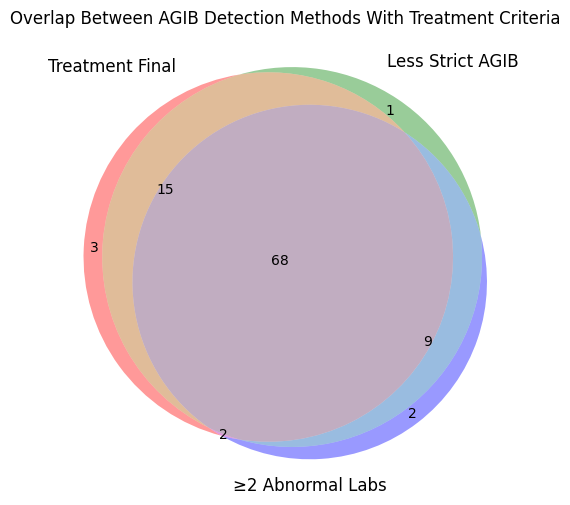

In [442]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_memberships

# Create the lab abnormality flag
df['abnormal_lab_panel'] = df[[
    'low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
    'high_mcv', 'high_inr', 'high_aptt', 'high_pt'
]].sum(axis=1, skipna=True) >= 2

df['treatment_criteria_2_of_3'] = df[[
    'final_hb_drop_evidence', 'scopie_after_seh', 'is_seh'
]].sum(axis=1, skipna=True) >= 2

# Create sets of patient IDs based on each condition
treatment_set = set(df[df['treatment_final']]['pseudo_id'])
less_strict_set = set(df[df['treatment_criteria_2_of_3']]['pseudo_id'])
lab_abnormal_set = set(df[df['abnormal_lab_panel']]['pseudo_id'])

# Plot Venn diagram
plt.figure(figsize=(8, 6))
venn3(
    [treatment_set, less_strict_set, lab_abnormal_set],
    set_labels=('Treatment Final', 'Less Strict AGIB', '≥2 Abnormal Labs')
)
plt.title('Overlap Between AGIB Detection Methods With Treatment Criteria')
plt.show()



<Figure size 1000x600 with 0 Axes>

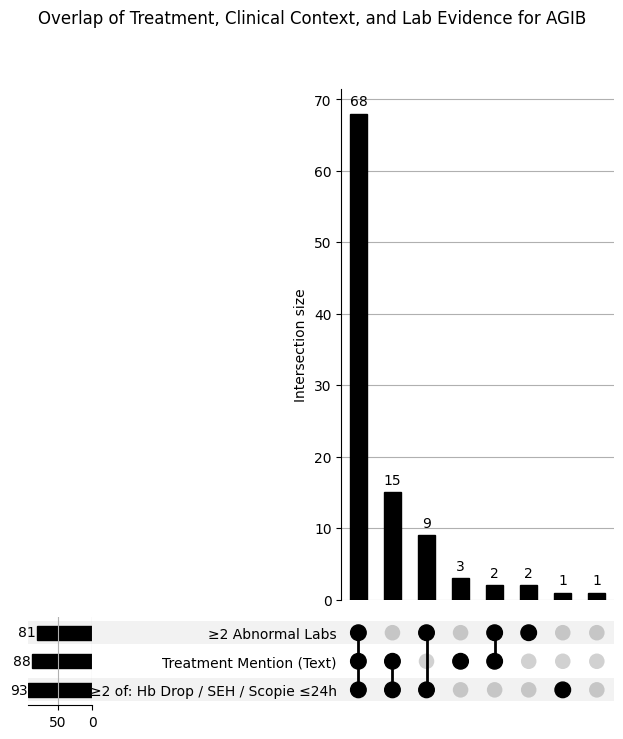

In [443]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_memberships

# Step 1: Define each group
df['abnormal_lab_panel'] = df[[
    'low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
    'high_mcv', 'high_inr', 'high_aptt', 'high_pt'
]].sum(axis=1, skipna=True) >= 2

df['treatment_criteria_2_of_3'] = df[[
    'final_hb_drop_evidence', 'scopie_after_seh', 'is_seh'
]].sum(axis=1, skipna=True) >= 2

# Step 2: Build membership list for UpSet
memberships = []
for _, row in df.iterrows():
    items = []
    if row['treatment_final']:
        items.append('Treatment Mention (Text)')
    if row['treatment_criteria_2_of_3']:
        items.append('≥2 of: Hb Drop / SEH / Scopie ≤24h')
    if row['abnormal_lab_panel']:
        items.append('≥2 Abnormal Labs')
    memberships.append(items)

# Step 3: Generate UpSet data and plot
upset_data = from_memberships(memberships)

plt.figure(figsize=(10, 6))
upset = UpSet(
    upset_data, 
    subset_size='count', 
    show_counts=True,
    sort_by='cardinality',
    intersection_plot_elements=15  # show more bars if needed
)
upset.plot()
plt.suptitle('Overlap of Treatment, Clinical Context, and Lab Evidence for AGIB')
plt.show()


Scopie

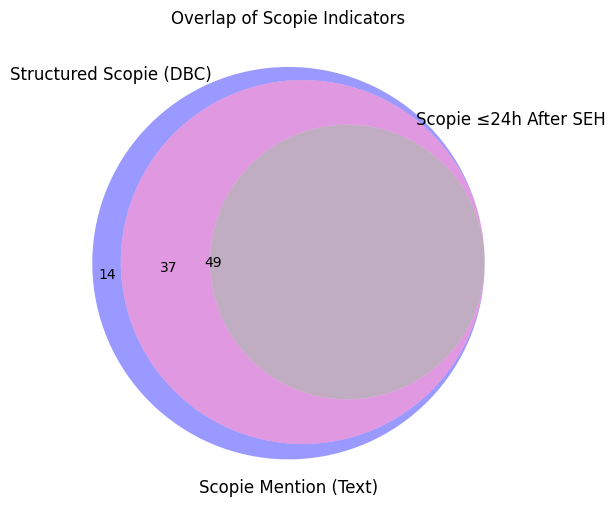

In [444]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Define sets
set1 = set(df[df['is_scopie'] == True]['pseudo_id'].unique())           # Structured
set2 = set(df[df['scopie_after_seh'] == True]['pseudo_id'].unique())    # Timed scopie
set3 = set(df[df['scopie_final'] == True]['pseudo_id'].unique())        # Text-based

# Plot Venn diagram
plt.figure(figsize=(7, 6))
venn3(
    [set1, set2, set3],
    set_labels=(
        'Structured Scopie (DBC)', 
        'Scopie ≤24h After SEH', 
        'Scopie Mention (Text)'
    )
)
plt.title("Overlap of Scopie Indicators")
plt.show()


In [445]:
df['agib_label_scopie_treatment'] = (
    df['scopie_final'] & 
    df_final_complete['treatment_final']
    
)

df['agib_label_scopie_treatment'].value_counts()

True     87
False    14
Name: agib_label_scopie_treatment, dtype: int64

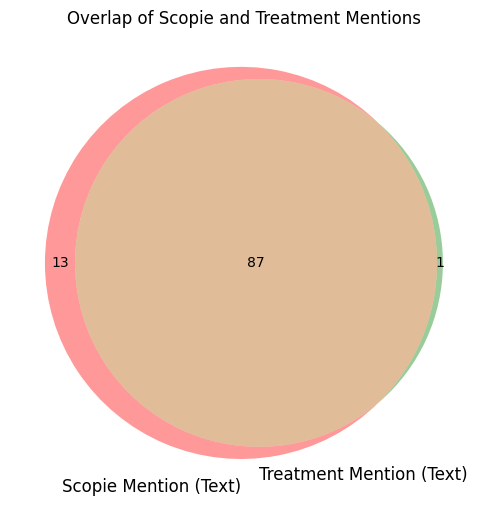

In [446]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Define sets
set1 = set(df[df['scopie_final'] == True]['pseudo_id'].unique())           
set2 = set(df[df['treatment_final'] == True]['pseudo_id'].unique())    

# Plot Venn diagram
plt.figure(figsize=(7, 6))
venn2(
    [set1, set2],
    set_labels=(
        'Scopie Mention (Text)', 
        'Treatment Mention (Text)'
    )
)
plt.title("Overlap of Scopie and Treatment Mentions")
plt.show()


In [447]:
df['agib_label_scopie'] = (
    df['scopie_final'] & 

    (    
    df[['scopie_after_seh', 'final_hb_drop_evidence', 'is_seh'
                        ]].sum(axis=1, skipna=True) >= 2)
    
    
)

df['agib_label_scopie'].value_counts()

True     92
False     9
Name: agib_label_scopie, dtype: int64

In [448]:
df['agib_label_scopie'] = (
    df['scopie_final'] & 
    (
    (df_final_complete[[
    'low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
    'high_mcv', 'high_inr', 'high_aptt', 'high_pt'
    ]].sum(axis=1, skipna=True) >= 2) |
    (    
    df[['scopie_after_seh', 'final_hb_drop_evidence', 'is_seh'
                        ]].sum(axis=1, skipna=True) >= 2)
    )
    
)

df['agib_label_scopie'].value_counts()

True     96
False     5
Name: agib_label_scopie, dtype: int64

In [449]:
df['agib_label_scopie'] = (
    df['scopie_final'] & df['scopie_after_seh'] &
    (
    (df_final_complete[[
    'low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
    'high_mcv', 'high_inr', 'high_aptt', 'high_pt'
    ]].sum(axis=1, skipna=True) >= 2) |
    (    
    df[['final_hb_drop_evidence', 'is_seh'
                        ]].sum(axis=1, skipna=True) >= 1)
    )
    
)

df['agib_label_scopie'].value_counts()

False    52
True     49
Name: agib_label_scopie, dtype: int64

C:\Users\Y.vanMegen\AppData\Local\Temp\ipykernel_20800\1708696309.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

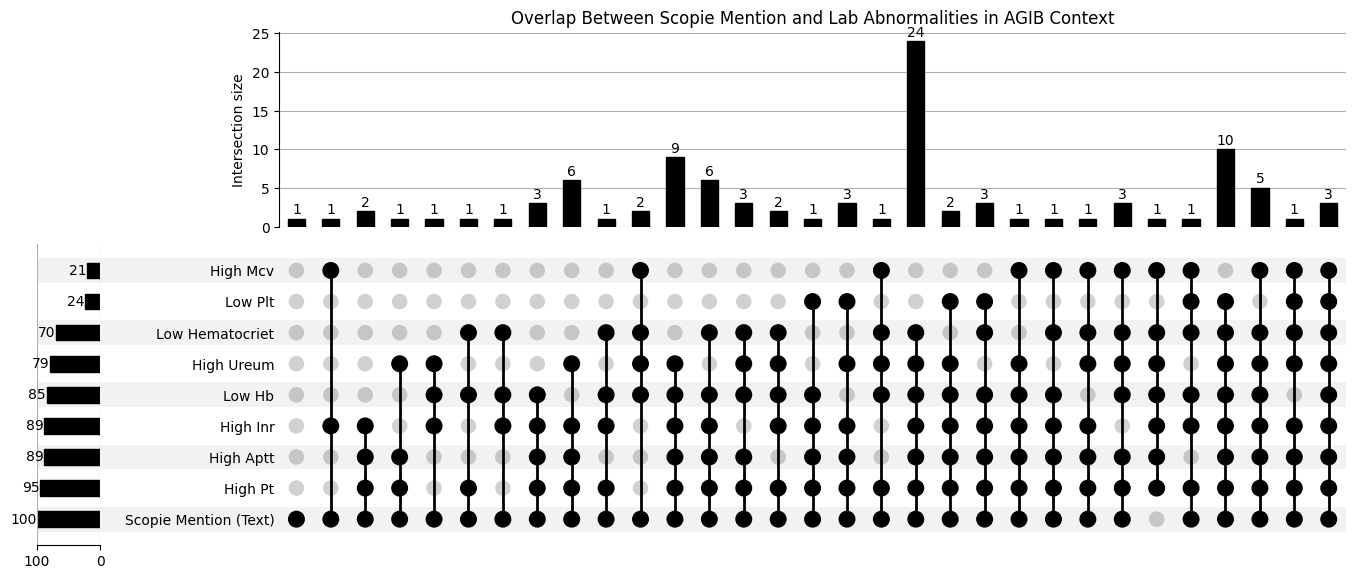

In [450]:
from upsetplot import from_memberships, UpSet
import matplotlib.pyplot as plt

# Define the individual variables to include
lab_columns = [
    'low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
    'high_mcv', 'high_inr', 'high_aptt', 'high_pt'
]

# Initialize list to store set memberships
memberships = []

# Iterate through each row to build sets
for _, row in df.iterrows():
    sets = []
    if row.get("scopie_final"):
        sets.append("Scopie Mention (Text)")
    for col in lab_columns:
        if row.get(col):
            sets.append(col.replace('_', ' ').title())  # Make names cleaner
    if sets:  # Only include rows with at least one True
        memberships.append(sets)

# Generate UpSet data
upset_data = from_memberships(memberships)

# Plot
plt.figure(figsize=(12, 6))
upset = UpSet(upset_data, subset_size='count', show_counts=True)
upset.plot()
plt.title("Overlap Between Scopie Mention and Lab Abnormalities in AGIB Context")
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

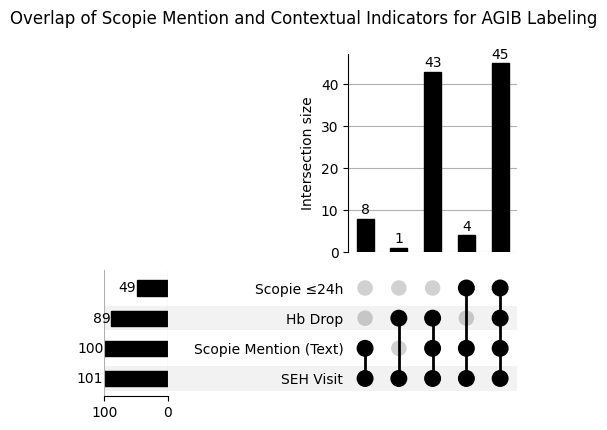

In [451]:
import pandas as pd
from matplotlib import pyplot as plt
from upsetplot import UpSet, from_memberships

# Use your actual DataFrame and columns
memberships = []
for _, row in df.iterrows():
    sets = []
    if row["scopie_final"]:
        sets.append("Scopie Mention (Text)")
    if row["final_hb_drop_evidence"]:
        sets.append("Hb Drop")
    if row["is_seh"]:
        sets.append("SEH Visit")
    if row["scopie_after_seh"]:
        sets.append("Scopie ≤24h")
    memberships.append(sets)

# Generate the UpSet data
upset_data = from_memberships(memberships)

# Plot
plt.figure(figsize=(10, 6))
upset = UpSet(upset_data, subset_size='count', show_counts=True)
upset.plot()
plt.suptitle("Overlap of Scopie Mention and Contextual Indicators for AGIB Labeling")
plt.show()


<Figure size 1000x600 with 0 Axes>

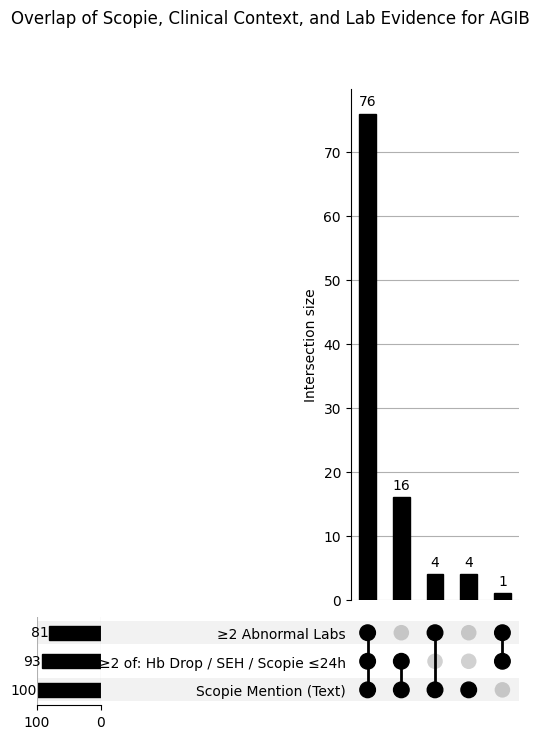

In [452]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_memberships

# Step 1: Define each group
df['abnormal_lab_panel'] = df[[
    'low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
    'high_mcv', 'high_inr', 'high_aptt', 'high_pt'
]].sum(axis=1, skipna=True) >= 2

df['scopie_criteria_2_of_3'] = df[[
    'final_hb_drop_evidence', 'scopie_after_seh', 'is_seh'
]].sum(axis=1, skipna=True) >= 2

# Step 2: Build membership list for UpSet
memberships = []
for _, row in df.iterrows():
    items = []
    if row['scopie_final']:
        items.append('Scopie Mention (Text)')
    if row['scopie_criteria_2_of_3']:
        items.append('≥2 of: Hb Drop / SEH / Scopie ≤24h')
    if row['abnormal_lab_panel']:
        items.append('≥2 Abnormal Labs')
    memberships.append(items)

# Step 3: Generate UpSet data and plot
upset_data = from_memberships(memberships)

plt.figure(figsize=(10, 6))
upset = UpSet(
    upset_data, 
    subset_size='count', 
    show_counts=True,
    sort_by='cardinality',
    intersection_plot_elements=15  # show more bars if needed
)
upset.plot()
plt.suptitle('Overlap of Scopie, Clinical Context, and Lab Evidence for AGIB')
plt.show()


Final

In [453]:
# Define helper logic blocks
lab_criteria = (
#     (df_final_complete['low_hb'] == True) &
#     (df_final_complete['high_ureum'] == True)
# ) | (
    # df_final_complete[['low_hb', 'low_hematocriet', 'low_plt',
    #                    'low_mcv', 'high_inr', 'high_aptt', 'high_pt']].sum(axis=1, skipna=True) >= 2
    df[['low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
                   'high_mcv', 'high_inr', 'high_aptt', 'high_pt']].fillna(False).sum(axis=1) >= 2

)

contextual_criteria = df[[
    'final_hb_drop_evidence', 'scopie_after_seh', 'is_seh'
    ]].sum(axis=1, skipna=True) >= 2


treatment_pathway = (
    (df['treatment_final'] == True) & (
         contextual_criteria | lab_criteria
    )
)

scopie_pathway = (
    (df['scopie_final'] == True) & (
         contextual_criteria | lab_criteria
    )
)

gib_pathway = (
    (df['gib_final'] == True) & 
    (lab_criteria | contextual_criteria)
    )


# Final likely AGIB decision
df['likely_agib_bleed'] = (
    (df['agib_final'] == True) |
    gib_pathway |
    treatment_pathway |
    scopie_pathway

)

df['likely_agib_bleed'].value_counts()

True     97
False     4
Name: likely_agib_bleed, dtype: int64

In [454]:
# Define helper logic blocks
lab_criteria = (

    df[['low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
                   'high_mcv', 'high_inr', 'high_aptt', 'high_pt']].fillna(False).sum(axis=1) >= 2

)

contextual_criteria = df[[
    'final_hb_drop_evidence', 'scopie_after_seh', 'is_seh'
    ]].sum(axis=1, skipna=True) >= 2


treatment_pathway = (
    (df['treatment_final'] == True) & (
         contextual_criteria | lab_criteria
    )
)

scopie_pathway = (
    (df['scopie_final'] == True) & (
         contextual_criteria | lab_criteria
    )
)

gib_pathway = (
    (df['gib_final'] == True) & 
    (lab_criteria | contextual_criteria)
    )


# Final likely AGIB decision
df['likely_agib_bleed'] = (
    (df['agib_final'] == True) |
    gib_pathway |
    # treatment_pathway |
    # scopie_pathway

    
    (treatment_pathway & (df['gib_final'] == True)) |
    (scopie_pathway& (df['gib_final'] == True))

)

df['likely_agib_bleed'].value_counts()

True     96
False     5
Name: likely_agib_bleed, dtype: int64

In [455]:
# Define helper logic blocks
lab_criteria = (
    (df['low_hb'] == True) & 
    # df['high_ureum'] == True &
    (

    df[['low_hematocriet', 'low_plt', 'high_ureum',
        'high_mcv', 'high_inr', 'high_aptt', 'high_pt']].fillna(False).sum(axis=1) >= 2
    )

)

contextual_criteria = df[[
    'final_hb_drop_evidence', 'scopie_after_seh', 'is_seh'
    ]].sum(axis=1, skipna=True) >= 2

treatment_pathway = (
    (df['treatment_final'] == True) & (
    contextual_criteria | lab_criteria
    )
)

scopie_pathway = (
    (df['scopie_final'] == True) &     
    (contextual_criteria | lab_criteria)
)

gib_pathway = (
    (df['gib_final'] == True) & (contextual_criteria | lab_criteria)
    )


# Final likely AGIB decision
df['likely_agib_bleed'] = (
    (df['agib_final'] == True) |
    gib_pathway |
    treatment_pathway |
    scopie_pathway
)

df['likely_agib_bleed'].value_counts()

True     96
False     5
Name: likely_agib_bleed, dtype: int64

In [456]:
df['agib_label_seh_gib'] = (
    (df['agib_final'] |
    df['gib_final']) & 
    df['is_seh'] 
)

df['agib_label_seh_gib'].value_counts()

True     100
False      1
Name: agib_label_seh_gib, dtype: int64

In [457]:
# Define helper logic blocks
lab_criteria = (
    (df['low_hb'] == True) & (
    # df_final_complete[['low_hb', 'low_hematocriet', 'low_plt',
    #                    'low_mcv', 'high_inr', 'high_aptt', 'high_pt']].sum(axis=1, skipna=True) >= 2
    df[['low_hematocriet', 'low_plt', 'high_ureum',
                   'high_mcv', 'high_inr', 'high_aptt', 'high_pt']].fillna(False).sum(axis=1) >= 2 )

)

contextual_criteria = df[[
    'final_hb_drop_evidence', 'scopie_after_seh', 'is_seh'
    ]].sum(axis=1, skipna=True) >= 2


treatment_pathway = (
    (df['treatment_final'] == True) & (
        df['low_hb'] == True | contextual_criteria | lab_criteria
    )
)

scopie_pathway = (
    (df['scopie_final'] == True) &     
    (df['low_hb'] == True | contextual_criteria | lab_criteria)
)

gib_pathway = (
    (df['gib_final'] == True) & (contextual_criteria | lab_criteria)
    )


# Final likely AGIB decision
df['likely_agib_bleed'] = (
    (df['agib_final'] == True) |
    gib_pathway |
    (treatment_pathway & (df['gib_final'] == True)) |
    (scopie_pathway& (df['gib_final'] == True))
)

df['likely_agib_bleed'].value_counts()

True     100
False      1
Name: likely_agib_bleed, dtype: int64

C:\Users\Y.vanMegen\AppData\Local\Temp\ipykernel_20800\4049162690.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

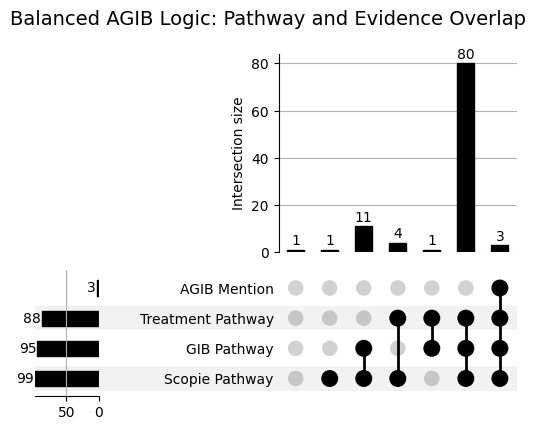

In [458]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import from_memberships, UpSet

# Define logic components (use same logic as your label)
lab_criteria = (
    (df['low_hb'] == True) & (
        df[['low_hematocriet', 'low_plt', 'high_ureum',
            'high_mcv', 'high_inr', 'high_aptt', 'high_pt']].fillna(False).sum(axis=1) >= 2
    )
)

contextual_criteria = (
    df[['final_hb_drop_evidence', 'scopie_after_seh', 'is_seh']]
    .sum(axis=1, skipna=True) >= 2
)

# Build pathway logic
df['GIB Pathway'] = df['gib_final'] & (lab_criteria | contextual_criteria)
df['Treatment Pathway'] = df['treatment_final'] & df['gib_final'] & (
    df['low_hb'] | contextual_criteria | lab_criteria
)
df['Scopie Pathway'] = df['scopie_final'] & df['gib_final'] & (
    df['low_hb'] | contextual_criteria | lab_criteria
)
df['AGIB Mention'] = df['agib_final']

# Create membership sets
memberships = []
for _, row in df.iterrows():
    items = []
    if row['GIB Pathway']:
        items.append('GIB Pathway')
    if row['Treatment Pathway']:
        items.append('Treatment Pathway')
    if row['Scopie Pathway']:
        items.append('Scopie Pathway')
    if row['AGIB Mention']:
        items.append('AGIB Mention')
    memberships.append(items)

# Create UpSet data and plot
upset_data = from_memberships(memberships)

plt.figure(figsize=(10, 6))
UpSet(upset_data, subset_size='count', show_counts=True).plot()
plt.suptitle('Balanced AGIB Logic: Pathway and Evidence Overlap', fontsize=14)
plt.tight_layout()
plt.show()


In [459]:
# Define stricter lab criteria: low Hb + at least one other abnormality
lab_strict = (
    (df['low_hb'] == True) &
    (
        df[['low_hematocriet', 'low_plt', 'high_ureum',
            'high_mcv', 'high_inr', 'high_aptt', 'high_pt']].fillna(False).sum(axis=1) >= 1
    )
)

# All contextual requirements
context_strict = (
    df['is_seh'] &
    df['scopie_after_seh'] &
    df['final_hb_drop_evidence']
)

# GIB text mention required
strict_text = df['gib_final']

# Final strict label
df['strict_agib_label_structured_only'] = strict_text & context_strict & lab_strict

print(df['strict_agib_label_structured_only'].value_counts())


False    64
True     37
Name: strict_agib_label_structured_only, dtype: int64


In [460]:
df['strict_agib_label_strong_context'] = (
    df['gib_final'] &
    df['treatment_final'] &
    df['scopie_final'] &
    df['is_seh'] &
    df['scopie_after_seh'] &
    df['final_hb_drop_evidence'] &
    df['low_hb'] &
    (
        df[['low_hematocriet', 'low_plt', 'high_ureum', 'high_mcv',
            'high_inr', 'high_aptt', 'high_pt']]
        .fillna(False).sum(axis=1) >= 1
    )
)

print(df['strict_agib_label_strong_context'].value_counts())


False    67
True     34
Name: strict_agib_label_strong_context, dtype: int64


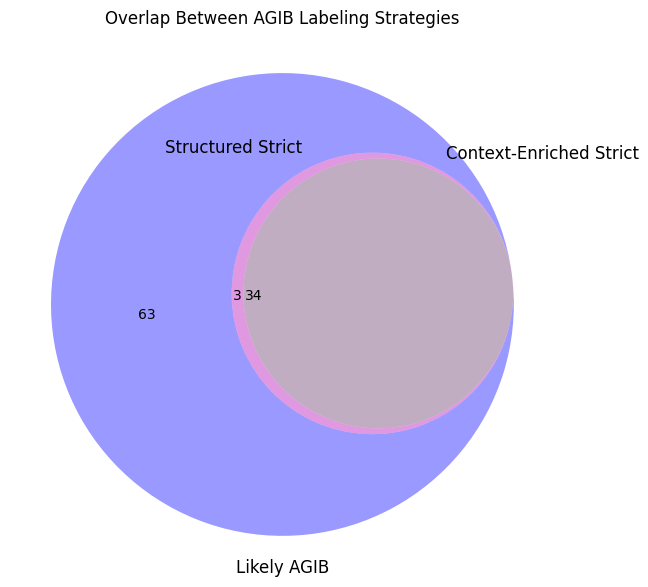

In [461]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Define the sets
structured_strict = set(df[df['strict_agib_label_structured_only']]['pseudo_id'])
context_enriched = set(df[df['strict_agib_label_strong_context']]['pseudo_id'])
broad_label = set(df[df['likely_agib_bleed']]['pseudo_id'])

# Plot
plt.figure(figsize=(8, 6))
venn3(
    [structured_strict, context_enriched, broad_label],
    set_labels=('Structured Strict', 'Context-Enriched Strict', 'Likely AGIB')
)
plt.title("Overlap Between AGIB Labeling Strategies")
plt.tight_layout()
plt.show()


C:\Users\Y.vanMegen\AppData\Local\Temp\ipykernel_20800\3649066351.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

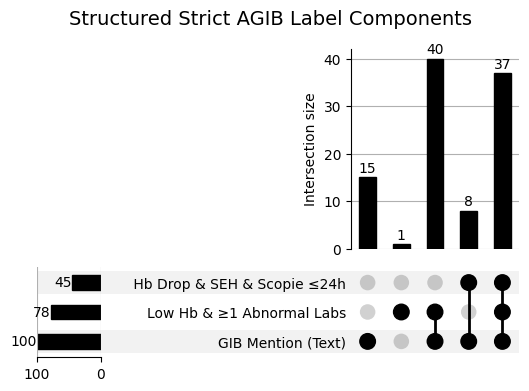

In [462]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_memberships

# Define individual components
df['strict_labs'] = (
    (df['low_hb'] == True) &
    (df[['low_hematocriet', 'low_plt', 'high_ureum',
         'high_mcv', 'high_inr', 'high_aptt', 'high_pt']]
     .fillna(False).sum(axis=1) >= 1)
)

df['strict_context'] = (
    df['is_seh'] & df['scopie_after_seh'] & df['final_hb_drop_evidence']
)

df['strict_text'] = df['gib_final']

# Create readable labels
label_map = {
    'strict_text': 'GIB Mention (Text)',
    'strict_context': ' Hb Drop & SEH & Scopie ≤24h',
    'strict_labs': 'Low Hb & ≥1 Abnormal Labs'
}

# Construct memberships using renamed labels
memberships = []
for _, row in df.iterrows():
    sets = []
    if row['strict_text']:
        sets.append(label_map['strict_text'])
    if row['strict_context']:
        sets.append(label_map['strict_context'])
    if row['strict_labs']:
        sets.append(label_map['strict_labs'])
    memberships.append(sets)

# Generate UpSet data and plot
from upsetplot import from_memberships, UpSet

upset_data = from_memberships(memberships)
plt.figure(figsize=(10, 6))
UpSet(upset_data, subset_size='count', show_counts=True).plot()
plt.suptitle("Structured Strict AGIB Label Components", fontsize=14)
plt.tight_layout()
plt.show()


C:\Users\Y.vanMegen\AppData\Local\Temp\ipykernel_20800\2826200509.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1200x700 with 0 Axes>

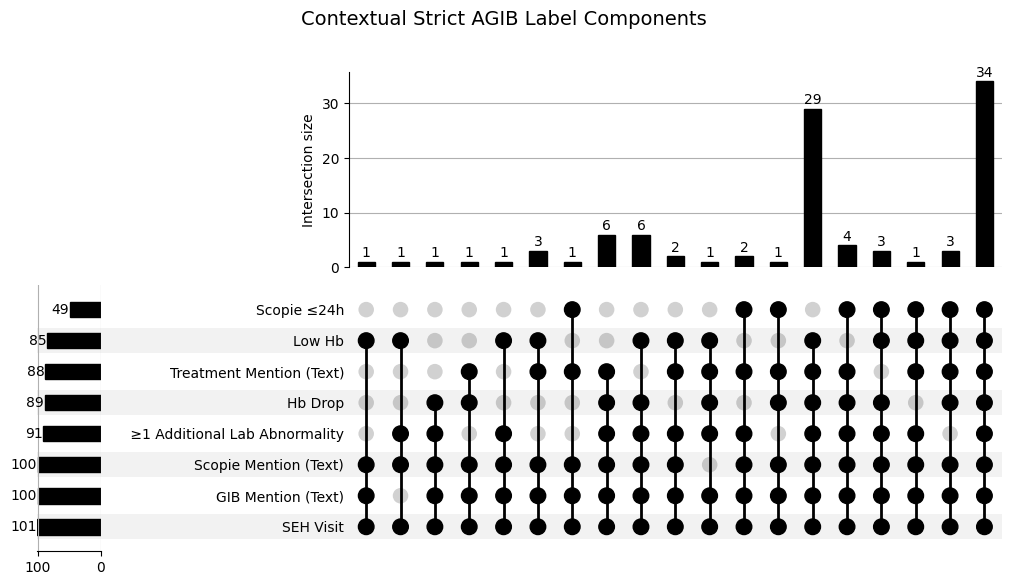

In [463]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import from_memberships, UpSet

# Define components of the strict rule
df['strong_text'] = df['gib_final']
df['strong_treatment'] = df['treatment_final']
df['strong_scopie'] = df['scopie_final']
df['strong_seh'] = df['is_seh']
df['strong_scopie_24h'] = df['scopie_after_seh']
df['strong_hb_drop'] = df['final_hb_drop_evidence']
df['strong_low_hb'] = df['low_hb']
df['strong_lab_extra'] = (
    df[['low_hematocriet', 'low_plt', 'high_ureum',
        'high_mcv', 'high_inr', 'high_aptt', 'high_pt']]
    .fillna(False).sum(axis=1) >= 1
)

# Label map for better readability
label_map = {
    'strong_text': 'GIB Mention (Text)',
    'strong_treatment': 'Treatment Mention (Text)',
    'strong_scopie': 'Scopie Mention (Text)',
    'strong_seh': 'SEH Visit',
    'strong_scopie_24h': 'Scopie ≤24h',
    'strong_hb_drop': 'Hb Drop',
    'strong_low_hb': 'Low Hb',
    'strong_lab_extra': ' ≥1 Additional Lab Abnormality'
}

# Construct membership list for upsetplot
memberships = []
for _, row in df.iterrows():
    sets = []
    for key, label in label_map.items():
        if row[key]:
            sets.append(label)
    memberships.append(sets)

# Create and plot the UpSet diagram
upset_data = from_memberships(memberships)
plt.figure(figsize=(12, 7))
UpSet(upset_data, subset_size='count', show_counts=True).plot()
plt.suptitle("Contextual Strict AGIB Label Components", fontsize=14)
plt.tight_layout()
plt.show()


BERTopic

In [464]:
df_BERT = pd.read_csv('df_BERTopic_labels.csv')
print(df_BERT[df_BERT['agib_classification'] == "AGIB-related"]['pseudo_id'].nunique())
df_BERT

94


,pseudo_id,verslagen_report_tags,verslagen_report_content,verslagen_report_start_date,date,alltext,tokens,text,Topic,Tags,Keywords,new_topic_label,verslagen_report_tags_new_topic_label,agib_classification
0,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Klinische Brief,"Dhr. A.J. Dingemans, huisarts\r\n[STREETNAME] ...",2020-11-26 15:06:00,2020-11-26 15:06:00,dhr aj dingemans huisarts streetnaam city datu...,"['aj', 'dingemans', 'streetnaam', 'Kenmerk', '...",aj dingemans streetnaam Kenmerk patientid betr...,1,['Topic 1'],"['oraal stuk', 'tablet oraal', 'tablet oraal s...",Oral Medication,Klinische Brief | Oral Medication,Unrelated
1,088C9FD98B8B2CBCB597C17C07AC1845B21F0849,Klinische Brief,"Mw. C.M. Staal, huisarts\r\n[STREETNAME] RE [...",2023-01-29 12:08:00,2023-01-29 12:08:00,mw cm staal huisarts streetname re city datum ...,"['cm', 'staal', 're', 'kenmerk', 'patientid', ...",cm staal re kenmerk patientid betreffen heer i...,-1,['Topic -1'],[],Outlier,Klinische Brief | Outlier,Unrelated
2,088C9FD98B8B2CBCB597C17C07AC1845B21F0849,Klinische Brief,"Mw. C.M. Staal, huisarts\r\n[STREETNAME] RE [...",2023-01-20 11:53:00,2023-01-20 11:53:00,mw cm staal huisarts streetname re city datum ...,"['cm', 'staal', 're', 'kenmerk', 'patientid', ...",cm staal re kenmerk patientid betreffen heer i...,-1,['Topic -1'],[],Outlier,Klinische Brief | Outlier,Unrelated
3,088C9FD98B8B2CBCB597C17C07AC1845B21F0849,Klinische Brief,"Mw. C.M. Staal, huisarts\r\nFransebaan 586\r\n...",2017-11-13 18:22:00,2017-11-13 18:22:00,mw cm staal huisarts fransebaan re city datum ...,"['cm', 'staal', 'fransebaan', 're', 'kenmerk',...",cm staal fransebaan re kenmerk patientid betre...,1,['Topic 1'],"['oraal stuk', 'tablet oraal', 'tablet oraal s...",Oral Medication,Klinische Brief | Oral Medication,Unrelated
4,0A5645E02FA818D1629926B6BEFA81CF91C25A46,Klinische Brief,Aan de weledelgeleerde heer\r\ndrs. L.J.A.L. H...,2021-01-21 18:32:00,2021-01-21 18:32:00,weledelgeleer heer drs ljal hendrikx huisarts ...,"['weledelgeleer', 'heer', 'drs', 'ljal', 'hend...",weledelgeleer heer drs ljal hendrikx groenstra...,0,['Topic 0'],"['oraal stuk', 'tablet oraal', 'tablet oraal s...",Oral Meds & Documentation,Klinische Brief | Oral Meds & Documentation,Unrelated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9407,F8C241E69061BB450778B7A4CC336FF520469A0A,"Consult, Telefonisch consult",Samenvatting: \nVoorgeschiedenis\n1994 cervixc...,2018-12-21 20:13:00,2018-12-21 20:13:00,samenvatting voorgeschiedenis cervixcarcinoom ...,"['cervixcarcinoom', 'hypertensie', 'hypothyreo...",cervixcarcinoom hypertensie hypothyreoïdie tot...,2,['Topic 2'],"['totaal heup', 'polycythaemia vera', 'toename...",Hematologic Disorders,"Consult, Telefonisch consult | Hematologic Dis...",Supportive
9408,F8D116F01EE0039678998F393FA337C10AD4F4E2,"Consult, Telefonisch consult",Samenvatting: \n2016 geen osteoporose\n2016 hy...,2020-06-26 15:00:00,2020-06-26 15:00:00,samenvatting osteoporose hypocalciurie april d...,"['osteoporose', 'hypocalciurie', 'dementie', '...",osteoporose hypocalciurie dementie Jun prol Re...,0,['Topic 0'],"['overig actie', 'aanvullen onderzoek', 'dun d...",Iron Deficiency Workup,"Consult, Telefonisch consult | Iron Deficiency...",Supportive
9409,F8D116F01EE0039678998F393FA337C10AD4F4E2,"Consult, Telefonisch consult",Samenvatting: \n2016 geen osteoporose\n2016 hy...,2020-04-16 11:57:00,2020-04-16 11:57:00,samenvatting osteoporose hypocalciurie april d...,"['osteoporose', 'hypocalciurie', 'dementie', '...",osteoporose hypocalciurie dementie Jun prol Re...,0,['Topic 0'],"['overig actie', 'aanvullen onderzoek', 'dun d...",Iron Deficiency Workup,"Consult, Telefonisch consult | Iron Deficiency...",Supportive
9410,F8D116F01EE0039678998F393FA337C10AD4F4E2,"Consult, Telefonisch consult",Samenvatting: \n2016 geen osteoporose\n2016 hy...,2020-03-27 12:14:00,2020-03-27 12:14:00,samenvatting osteoporose hypocalciurie april d...,"['osteoporose', 'hypocalciurie', 'dementie', '...",osteoporose hypocal

In [465]:
df['agib_BERTopic'] = df['pseudo_id'].isin(df_BERT[df_BERT['agib_classification'] == "AGIB-related"]['pseudo_id'])
df['agib_BERTopic'].value_counts()

True     91
False    10
Name: agib_BERTopic, dtype: int64

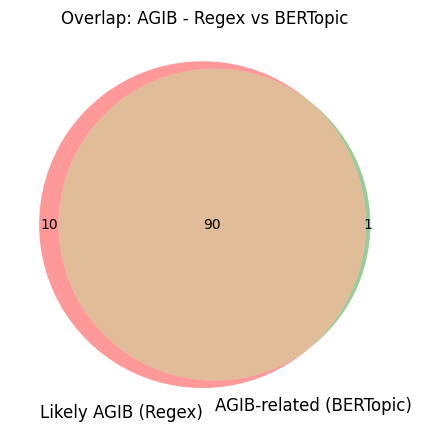

In [466]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
venn2(
    subsets=(
        set(df[df['likely_agib_bleed'] == True]['pseudo_id']),
        set(df[df['agib_BERTopic'] == True]['pseudo_id'])
    ),
    set_labels=('Likely AGIB (Regex)', 'AGIB-related (BERTopic)')
)
plt.title("Overlap: AGIB - Regex vs BERTopic")
plt.show()


c:\Users\Y.vanMegen\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib_venn\layout\venn3\pairwise.py:169: UserWarning: Bad circle positioning.
  warnings.warn("Bad circle positioning.")


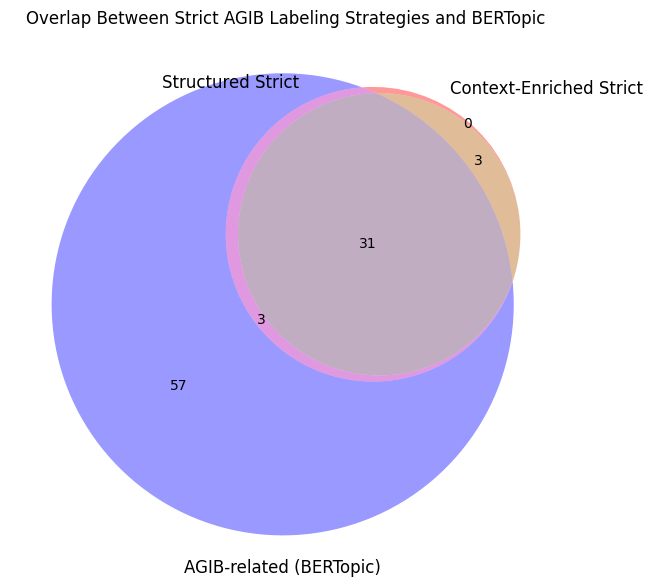

In [467]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Define the sets
structured_strict = set(df[df['strict_agib_label_structured_only']]['pseudo_id'])
context_enriched = set(df[df['strict_agib_label_strong_context']]['pseudo_id'])
broad_label = set(df[df['agib_BERTopic']]['pseudo_id'])

# Plot
plt.figure(figsize=(8, 6))
venn3(
    [structured_strict, context_enriched, broad_label],
    set_labels=('Structured Strict', 'Context-Enriched Strict', 'AGIB-related (BERTopic)')
)
plt.title("Overlap Between Strict AGIB Labeling Strategies and BERTopic")
plt.tight_layout()
plt.show()

In [468]:
y_true = [1 if label == True else 0 for label in df['likely_agib_bleed']]
y_pred = [1 if label == True else 0 for label in df['agib_BERTopic']]

print(y_true)
print(y_pred)

# print(f"--- Evaluation for: {agib_BERTopic} based on {likely_agib_bleed}---")
print("Accuracy :", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall   :", recall_score(y_true, y_pred))  # Sensitivity — how many AGIBs you captured
print("F1 Score :", f1_score(y_true, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))
print()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1]
Accuracy : 0.8910891089108911
Precision: 0.989010989010989
Recall   : 0.9
F1 Score : 0.9424083769633508
Confusion matrix:
 [[ 0  1]
 [10 90]]



In [469]:
y_true = [1 if label == True else 0 for label in df['strict_agib_label_strong_context']]
y_pred = [1 if label == True else 0 for label in df['agib_BERTopic']]

print(y_true)
print(y_pred)

# print(f"--- Evaluation for: {agib_BERTopic} based on {likely_agib_bleed}---")
print("Accuracy :", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall   :", recall_score(y_true, y_pred))  # Sensitivity — how many AGIBs you captured
print("F1 Score :", f1_score(y_true, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))
print()

[1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1]
Accuracy : 0.37623762376237624
Precision: 0.34065934065934067
Recall   : 0.9117647058823529
F1 Score : 0.496
Confusion matrix:
 [[ 7 60]
 [ 3 31]]

